# Data analysis, Visualizations (kind of)

## [Original dataset](https://www.kaggle.com/competitions/accelerometer-biometric-competition/overview/description)

In [2]:
import pandas as pd


In [8]:
df_raw = pd.read_csv("../diploma/accelerometer-biometric-competition/train.csv")

In [9]:
df_raw = df_raw.rename(columns={
    "T": "timestamp",
    "X": "x_axis",
    "Y": "y_axis",
    "Z": "z_axis",
    "Device": "user_id"
})

In [10]:
# Convert the timestamp to datetime format
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

In [11]:
df_raw

,timestamp,x_axis,y_axis,z_axis,user_id
0,2012-05-10 10:17:48.311000064,0.340509,8.308413,4.140585,7
1,2012-05-10 10:17:48.531000064,0.381370,8.390134,4.249548,7
2,2012-05-10 10:17:48.753999872,0.272407,8.471856,4.018002,7
3,2012-05-10 10:17:48.971000064,0.149824,8.430995,4.290409,7
4,2012-05-10 10:17:49.191000064,0.272407,8.430995,4.481094,7
...,...,...,...,...,...
29563978,2012-05-13 06:56:10.584000000,-0.306000,-0.306000,-9.500000,1037
29563979,2012-05-13 06:56:10.660000000,-0.459000,-0.306000,-9.653000,1037
29563980,2012-05-13 06:56:10.828000000,-0.153000,-0.306000,-9.807000,1037
29563981,2012-05-13 06:56:10.843000064,-0.306000,-0.459000,-9.347000,1037


In [6]:
df_raw.to_csv("df_raw.csv", index=False)

## Visualizations and data preprocessing

In [4]:
import pandas as pd

df_main = pd.read_csv("df_raw.csv", parse_dates=["timestamp"])

In [5]:
df_main

,timestamp,x_axis,y_axis,z_axis,user_id
0,2012-05-10 10:17:48.311000064,0.340509,8.308413,4.140585,7
1,2012-05-10 10:17:48.531000064,0.381370,8.390134,4.249548,7
2,2012-05-10 10:17:48.753999872,0.272407,8.471856,4.018002,7
3,2012-05-10 10:17:48.971000064,0.149824,8.430995,4.290409,7
4,2012-05-10 10:17:49.191000064,0.272407,8.430995,4.481094,7
...,...,...,...,...,...
29563978,2012-05-13 06:56:10.584000000,-0.306000,-0.306000,-9.500000,1037
29563979,2012-05-13 06:56:10.660000000,-0.459000,-0.306000,-9.653000,1037
29563980,2012-05-13 06:56:10.828000000,-0.153000,-0.306000,-9.807000,1037
29563981,2012-05-13 06:56:10.843000064,-0.306000,-0.459000,-9.347000,1037


In [12]:
df_main.user_id.nunique()

387

Size of the raw dataframe: (29563983, 5)


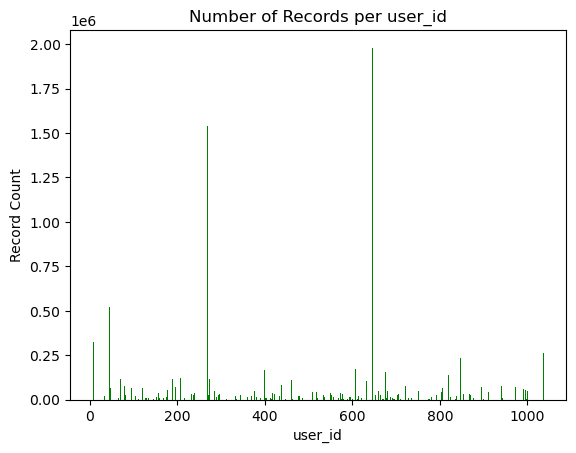

In [6]:
import matplotlib.pyplot as plt 

print("Size of the raw dataframe:", df_main.shape)

# Assuming you have the data in a DataFrame named 'df'
user_counts = df_main['user_id'].value_counts()

# Plotting the histogram
plt.bar(user_counts.index, user_counts.values, color="green")
plt.xlabel('user_id')
plt.ylabel('Record Count')
plt.title('Number of Records per user_id')
plt.show()

Now I will create a df of 30k records per each user. 15k rows I will use to generate train dataset, other 15k to generate test dataset.
A user’s data is not considered to develop models if the amount of data samples are fewer than 15 000. The sampling rate for the accelerometer data is 5 Hz, which corresponds to 5 data samples being registered every second. So, 15 000 data samples correspond to 15 000/5  3000 s  50 min.

 In other words, training dataset will contain 50 min of accelerometer data per user.

In [10]:
to_keep = df_main.user_id.value_counts()[df_main.user_id.value_counts() > 30000].index

df_main = df_main[df_main.user_id.isin(to_keep)]

In [11]:
to_keep

Int64Index([646, 269, 967,  68, 663, 762, 110, 997,  27,   7,
            ...
            617, 577, 309,  67, 699, 503, 325, 296, 854, 880],
           dtype='int64', length=152)

In [12]:
to_keep = df_main.user_id.value_counts()[df_main.user_id.value_counts() > 30000].index

df_30k = df_main[df_main.user_id.isin(to_keep)]

## Lets take only 30000 rows per each user

In [13]:
# Filter the DataFrame by the first 15k rows for each user_id
df_30k = df_30k.groupby('user_id').head(30000)

# Sort the final DataFrame by timestamp
df_30k.sort_values('timestamp', inplace=True)

# Reset the index of the final DataFrame
df_30k.reset_index(drop=True, inplace=True)

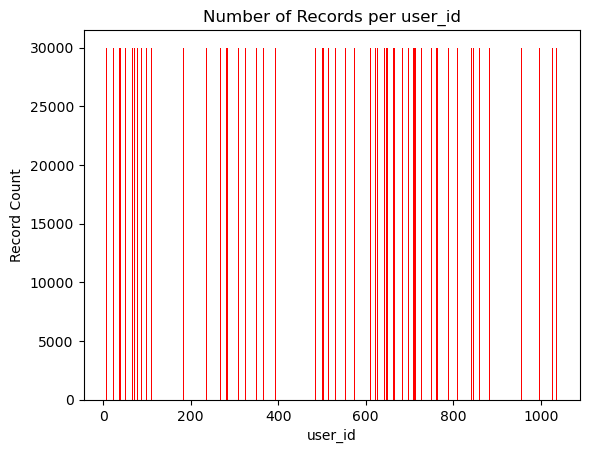

In [14]:
import matplotlib.pyplot as plt 


# Assuming you have the data in a DataFrame named 'df'
user_counts = df_30k['user_id'].value_counts()

# Plotting the histogram
plt.bar(user_counts.index, user_counts.values, color="r")
plt.xlabel('user_id')
plt.ylabel('Record Count')
plt.title('Number of Records per user_id')
plt.show()

In [15]:
df_30k.user_id.nunique()

152

Also I will observe data for 50 users.
I will create scaleograms datasets for 10, 25 and all 50 users. And train models to classify correspondigly 10, 25 and 50 classes.

In [16]:
users_50 = df_30k.user_id.unique()[:50]

In [17]:
df_30k = df_30k[df_30k.user_id.isin(users_50)]

In [18]:
df_30k = df_30k.sort_values(["user_id", "timestamp"]).reset_index(drop=True)

In [19]:
df_30k

,timestamp,x_axis,y_axis,z_axis,user_id
0,2012-05-10 03:26:21.332000000,-0.572055,-1.988571,9.724928,8
1,2012-05-10 03:26:21.335000064,-0.531194,-1.988571,9.956474,8
2,2012-05-10 03:26:21.344999936,-0.531194,-2.179256,9.697687,8
3,2012-05-10 03:26:21.348999936,-0.926184,-2.492524,9.806650,8
4,2012-05-10 08:40:38.560999936,1.375655,0.000000,8.730643,8
...,...,...,...,...,...
1499995,2012-05-10 14:20:14.131000064,-5.008670,5.295974,-0.842759,1015
1499996,2012-05-10 14:20:14.292000000,-6.607996,7.795521,-2.892196,1015
1499997,2012-05-10 14:20:14.452000000,-4.022259,10.113108,0.105345,1015
1499998,2012-05-10 14:20:14.612000000,-5.918467,10.486604,-0.153229,1015


In [20]:
# Group the data by user_id
grouped = df_30k.groupby('user_id')

# Create df_train with 15k rows per user
df_train = grouped.head(15000).reset_index(drop=True)

# Create df_test with another 15k rows per user
df_test = grouped.tail(15000).reset_index(drop=True)

In [21]:
df_train

,timestamp,x_axis,y_axis,z_axis,user_id
0,2012-05-10 03:26:21.332000000,-0.572055,-1.988571,9.724928,8
1,2012-05-10 03:26:21.335000064,-0.531194,-1.988571,9.956474,8
2,2012-05-10 03:26:21.344999936,-0.531194,-2.179256,9.697687,8
3,2012-05-10 03:26:21.348999936,-0.926184,-2.492524,9.806650,8
4,2012-05-10 08:40:38.560999936,1.375655,0.000000,8.730643,8
...,...,...,...,...,...
749995,2012-05-10 13:13:08.793999872,-0.842759,7.833828,5.803545,1015
749996,2012-05-10 13:13:08.956000000,-0.976834,7.718906,6.148310,1015
749997,2012-05-10 13:13:09.216999936,-0.967257,7.709330,5.813122,1015
749998,2012-05-10 13:13:09.275000064,-0.852336,7.766790,5.956774,1015


In [22]:
df_test

,timestamp,x_axis,y_axis,z_axis,user_id
0,2012-05-17 09:47:59.174000128,0.612916,4.372132,8.049625,8
1,2012-05-17 09:47:59.488000000,-0.721878,3.255263,6.319841,8
2,2012-05-17 09:47:59.614000128,-0.149824,3.718355,6.823794,8
3,2012-05-17 09:47:59.832999936,-0.503953,5.134871,9.915613,8
4,2012-05-17 09:48:00.081999872,0.503953,2.683209,8.621680,8
...,...,...,...,...,...
749995,2012-05-10 14:20:14.131000064,-5.008670,5.295974,-0.842759,1015
749996,2012-05-10 14:20:14.292000000,-6.607996,7.795521,-2.892196,1015
749997,2012-05-10 14:20:14.452000000,-4.022259,10.113108,0.105345,1015
749998,2012-05-10 14:20:14.612000000,-5.918467,10.486604,-0.153229,1015


In [23]:
df_train.to_csv("df_train.csv", index=False)
df_test.to_csv("df_test.csv", index=False)

In [24]:
# Set the desired time window
start_time = pd.Timestamp('2012-05-10 12:53:08')
end_time = pd.Timestamp('2012-05-10 13:13:08')

# Filter the data within the time window
df_window_for_1015 = df_train[(df_train['timestamp'] >= start_time) & (df_train['timestamp'] <= end_time)]
df_window_for_1015 = df_window_for_1015[df_window_for_1015.user_id == 1015]

In [25]:
# Set the desired time window
start_time = pd.Timestamp('2012-05-10 22:20:38')
end_time = pd.Timestamp('2012-05-12 00:00:38')

# Filter the data within the time window
df_window_for_8 = df_train[(df_train['timestamp'] >= start_time) & (df_train['timestamp'] <= end_time)]
df_window_for_8 = df_window_for_8[df_window_for_8.user_id == 8]
df_window_for_8

,timestamp,x_axis,y_axis,z_axis,user_id
1160,2012-05-11 03:24:31.880000000,0.000000,-0.149824,10.106298,8
1161,2012-05-11 03:24:31.883000064,0.190685,-0.108963,10.269742,8
1162,2012-05-11 03:24:31.904999936,0.190685,-0.040861,10.228881,8
1163,2012-05-11 03:24:31.907000064,0.108963,0.272407,10.228881,8
1164,2012-05-11 03:24:32.620999936,0.081722,1.797886,10.269742,8
...,...,...,...,...,...
4324,2012-05-11 17:20:22.759000064,-0.531194,-0.299648,9.915613,8
4325,2012-05-11 17:20:22.966000128,-0.503953,-0.231546,9.956474,8
4326,2012-05-11 17:20:23.259000064,-0.503953,-0.299648,9.956474,8
4327,2012-05-11 17:20:24.104000000,-0.762740,-0.272407,9.724928,8


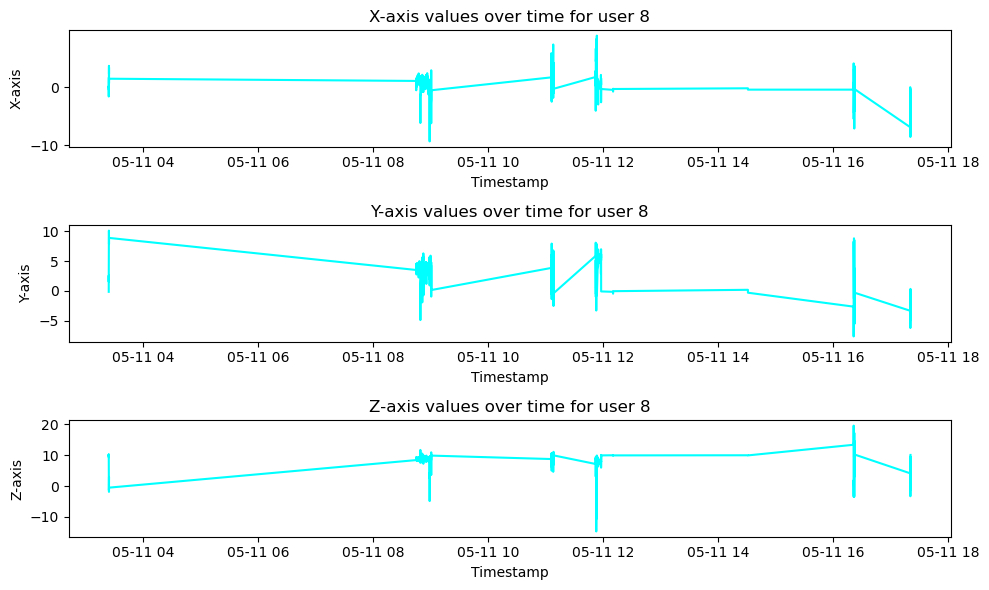

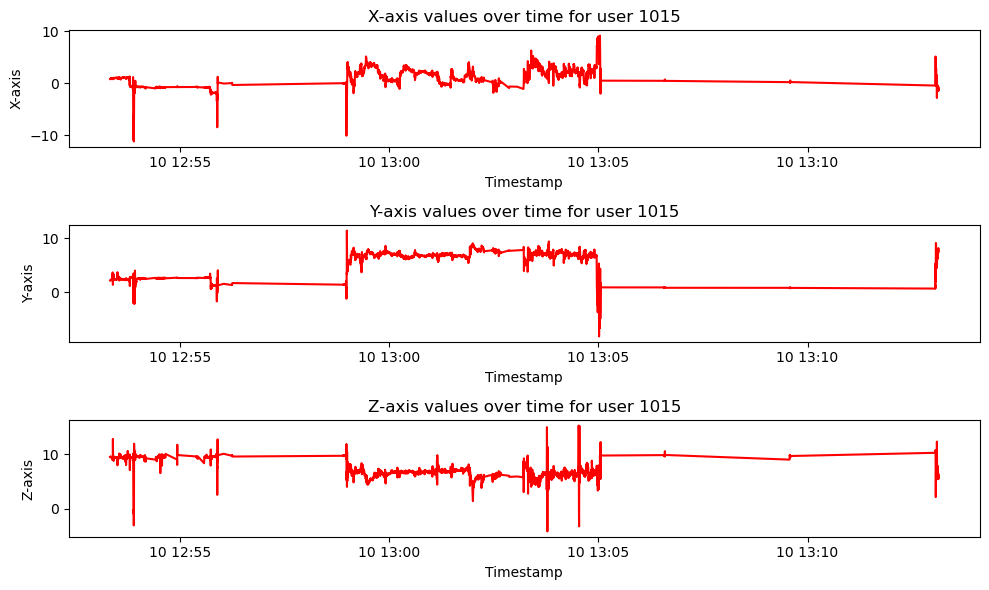

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

for df, color in zip([df_window_for_8, df_window_for_1015], ["cyan", "red"]):
    user_id = df.user_id.unique()[0]
    # Plotting
    plt.figure(figsize=(10, 6))

    # X-axis chart
    plt.subplot(3, 1, 1)
    plt.plot(df['timestamp'], df['x_axis'], color=color)
    plt.xlabel('Timestamp')
    plt.ylabel('X-axis')
    plt.title(f'X-axis values over time for user {user_id}')

    # Y-axis chart
    plt.subplot(3, 1, 2)
    plt.plot(df['timestamp'], df['y_axis'], color=color)
    plt.xlabel('Timestamp')
    plt.ylabel('Y-axis')
    plt.title(f'Y-axis values over time for user {user_id}')

    # Z-axis chart
    plt.subplot(3, 1, 3)
    plt.plot(df['timestamp'], df['z_axis'], color=color)
    plt.xlabel('Timestamp')
    plt.ylabel('Z-axis')
    plt.title(f'Z-axis values over time for user {user_id}')

    plt.tight_layout()
    plt.show()


# Converting accelerometer timeseries data to scaleograms (images)

In [1]:
import pandas as pd

In [2]:
!pip install PyWavelets -q

## Experimenting with different wavelet parameters

In [3]:
# import pandas as pd
# import pywt
# import numpy as np
# import matplotlib.pyplot as plt
# import os


# import pywt
# import numpy as np

# def _create_scaleogram(signal: np.ndarray, n=8, wavelet="mexh") -> np.ndarray:
#     """Creates scaleogram for signal, and returns it.

#     The resulting scaleogram represents scale in the first dimension, time in
#     the second dimension, and the color shows amplitude.
#     """

#     scale_list = np.arange(start=0, stop=len(signal)) / n + 1
#     scaleogram = pywt.cwt(signal, scale_list, wavelet)[0]
#     return scaleogram

# user_ids = [847, 284]
# for user_id in user_ids:
#     user_data = df[df['user_id'] == user_id].head(5000)
#     save_dir = f"testing_scaleograms/user_{user_id}"
#     os.makedirs(save_dir, exist_ok=True)

#     # Step 1: Create windows of size 225 with a shift factor of 30
#     window_size = 225
#     shift_factor = 30 # 10

#     scale_list = [4, 8, 16, 32]
#     wavelet_list = ['mexh', 'morl'] # breaks on "haar"

#     for scale in scale_list:
#         for wavelet in wavelet_list:
#             # Step 3: Create scaleograms for each axis for every window
#             x_axis_scaleograms = []
#             y_axis_scaleograms = []
#             z_axis_scaleograms = []

#             for i in range(0, len(user_data) - window_size + 1, shift_factor):
#                 window = user_data.iloc[i:i+window_size]

#                 x_axis_signal = window['x_axis'].to_numpy()
#                 y_axis_signal = window['y_axis'].to_numpy()
#                 z_axis_signal = window['z_axis'].to_numpy()

#                 x_axis_scaleogram = _create_scaleogram(x_axis_signal, n=scale, wavelet=wavelet)
#                 y_axis_scaleogram = _create_scaleogram(y_axis_signal, n=scale, wavelet=wavelet)
#                 z_axis_scaleogram = _create_scaleogram(z_axis_signal, n=scale, wavelet=wavelet)

#                 x_axis_scaleograms.append(x_axis_scaleogram)
#                 y_axis_scaleograms.append(y_axis_scaleogram)
#                 z_axis_scaleograms.append(z_axis_scaleogram)

#             # Step 4: Concatenate scaleograms vertically and save the images
#             output_dir = f"testing_scaleograms/user_{user_id}/{wavelet}/{scale}"
#             os.makedirs(output_dir, exist_ok=True)

#             for i in range(len(x_axis_scaleograms)):
#                 scaleogram_combined = np.concatenate(
#                     (x_axis_scaleograms[i], y_axis_scaleograms[i], z_axis_scaleograms[i]),
#                     axis=0
#                 )

#                 plt.imshow(scaleogram_combined, aspect='auto')
#                 plt.axis('off')
#                 plt.savefig(f"{output_dir}/scaleogram_{i}.png")
#                 plt.close()


## Generating scaleograms (images)

In [4]:
df_train = pd.read_csv("df_train.csv", parse_dates=["timestamp"])
df_test = pd.read_csv("df_test.csv", parse_dates=["timestamp"])

In [5]:
df_test.user_id.unique()

array([   8,   27,   45,   51,   52,   67,  120,  137,  148,  157,  162,
        177,  273,  274,  282,  283,  284,  285,  297,  350,  399,  438,
        518,  550,  554,  573,  622,  627,  632,  660,  684,  714,  720,
        721,  764,  810,  820,  847,  848,  854,  880,  882,  887,  895,
        941,  945,  973,  977,  991, 1015])

In [6]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt
import os
import time


def _create_scaleogram(signal: np.ndarray, n=16, wavelet="mexh") -> np.ndarray:
    """Creates scaleogram for signal, and returns it.

    The resulting scaleogram represents scale in the first dimension, time in
    the second dimension, and the color shows amplitude.
    """

    scale_list = np.arange(start=0, stop=len(signal)) / n + 1
    scaleogram = pywt.cwt(signal, scale_list, wavelet)[0]
    return scaleogram


In [7]:
import time
print(time.strftime("%H:%M:%S", time.localtime()))

07:19:30


In [8]:
started = time.time()

# for df, df_name in zip([df_train, df_test], ["train_dataset", "test_dataset"]):
for df, df_name in zip([df_train], ["test_dataset"]):
    print(time.strftime("%H:%M:%S", time.localtime()))
    print(f"Started processing {df_name}.")
    print(32 * "*")
    print()
    # for wavelet, n in zip(["mexh", "morl"], [16, 8]):
    wavelet = "mexh"
    n = 16
    n_users = df.user_id.nunique()
    SAVE_TO = f"{df_name}_{wavelet}_method"

    # Step 1: Create windows of size 225 with a shift factor of 30
    window_size = 225
    shift_factor = 30

    # Step 2: Perform operations separately for each user
    users = df['user_id'].unique()

    for user_id in users:
        user_data = df[df['user_id'] == user_id]

        # Check if folder already exists for user_id
        output_dir = f"{SAVE_TO}/user_{user_id}"
        if os.path.exists(output_dir):
            continue
        else:
            os.makedirs(output_dir, exist_ok=True)

        # Step 3: Create scaleograms for each axis for every window
        x_axis_scaleograms = []
        y_axis_scaleograms = []
        z_axis_scaleograms = []

        for i in range(0, len(user_data) - window_size + 1, shift_factor):
            window = user_data.iloc[i:i+window_size]

            x_axis_signal = window['x_axis'].to_numpy()
            y_axis_signal = window['y_axis'].to_numpy()
            z_axis_signal = window['z_axis'].to_numpy()

            x_axis_scaleogram = _create_scaleogram(x_axis_signal, n=n, wavelet=wavelet)
            y_axis_scaleogram = _create_scaleogram(y_axis_signal, n=n, wavelet=wavelet)
            z_axis_scaleogram = _create_scaleogram(z_axis_signal, n=n, wavelet=wavelet)

            x_axis_scaleograms.append(x_axis_scaleogram)
            y_axis_scaleograms.append(y_axis_scaleogram)
            z_axis_scaleograms.append(z_axis_scaleogram)

        # Step 4: Concatenate scaleograms vertically and save the images
        for i in range(len(x_axis_scaleograms)):
            scaleogram_combined = np.concatenate(
                (x_axis_scaleograms[i], y_axis_scaleograms[i], z_axis_scaleograms[i]),
                 axis=0
            )
            plt.imshow(scaleogram_combined, aspect='auto')
            plt.axis('off')
            plt.savefig(f"{output_dir}/scaleogram_{i}.png")
            plt.close()
        print()
        print("Processed user with id", user_id)
    print(f"Processing of {SAVE_TO} folder is done. It took {time.time() - started} sec.\n")
    print(32 * "*")
    print()

07:19:30
Started processing test_dataset.
********************************


Processed user with id 945

Processed user with id 973

Processed user with id 977

Processed user with id 991

Processed user with id 1015
Processing of test_dataset_mexh_method folder is done. It took 154.10768270492554 sec.

********************************



In [9]:
time.ctime()

'Fri Jun  9 07:22:04 2023'

# Code from Kaggle (for modeling)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def get_dataloaders(path, batch_size=32, train_size=0.8):
    # Define transformation to be applied to the scaleogram images
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Reshape images to 224x224
        transforms.ToTensor(),           # Convert images to tensors
        transforms.Normalize((0.5,), (0.5,))  # Normalize image tensors
    ])

    # Create a dataset object
    dataset = ImageFolder(path, transform=transform)
    # Split dataset into training and validation sets
    train_size_ = int(train_size * len(dataset))
    val_size_ = len(dataset) - train_size_
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size_, val_size_])

    # Create data loaders for training and validation sets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    return [train_loader, val_loader]

In [ ]:
import os
import pickle
import torch
import matplotlib.pyplot as plt
import zipfile


def save_model_and_results(method: str, model, results, num_classes):
    folder_name = f'{method}_{model._get_name()}_{num_classes}classes'

    # Create the folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    train_losses, train_accuracies, val_losses, val_accuracies = results

    with open(os.path.join(folder_name, 'train_losses.pickle'), 'wb') as file:
        pickle.dump(train_losses, file)
    with open(os.path.join(folder_name, 'val_losses.pickle'), 'wb') as file:
        pickle.dump(val_losses, file)

    with open(os.path.join(folder_name, 'train_accuracies.pickle'), 'wb') as file:
        pickle.dump(train_accuracies, file)
    with open(os.path.join(folder_name, 'val_accuracies.pickle'), 'wb') as file:
        pickle.dump(val_accuracies, file)

    # Save the trained model
    torch.save(model.state_dict(), os.path.join(folder_name, f'{model._get_name()}.pth'))

    # Visualize and save plots
    epochs = range(1, len(val_losses) + 1)

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, label='Train')
    plt.plot(epochs, val_losses, label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig(os.path.join(folder_name, 'loss_plot.png'))
    plt.show()
    plt.close()

    # Plot training and validation accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_accuracies, label='Train')
    plt.plot(epochs, val_accuracies, label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.savefig(os.path.join(folder_name, 'accuracy_plot.png'))
    plt.show()
    plt.close()

    # Create a zip file of the folder
    zip_filename = f'{folder_name}.zip'
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_name):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, arcname=os.path.relpath(file_path, folder_name))

    print(f"Successfully saved the model, results, and plots in {folder_name}!")
    print(f"Created a zip file: {zip_filename}")


In [ ]:
def train(model, num_epochs, dataloaders, criterion, optimizer):
    train_loader, val_loader = dataloaders
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Initialize lists to store training and validation metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        train_correct = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()

        train_loss /= len(train_loader.dataset)
        train_accuracy = 100.0 * train_correct / len(train_loader.dataset)

        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_accuracy = 100.0 * val_correct / len(val_loader.dataset)

        # Update metrics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch + 1}/{num_epochs}: '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
        print(time.strftime("%H:%M:%S", time.localtime()))
    return [train_losses, train_accuracies, val_losses, val_accuracies]

In [ ]:
train_dataset_path = "/kaggle/input/new-wavelet-datasets-for-my-diploma/train_dataset_mexh_method/train_dataset_mexh_method"
test_dataset_path = "/kaggle/input/new-wavelet-datasets-for-my-diploma/test_dataset_mexh_method 2/test_dataset_mexh_method"

In [ ]:
import time


NUM_EPOCHS = 25


for dataset_path in [train_dataset_path]: # in case you want to train different models on different datasets
    print("\n\n" + 64*"*")
    print(time.strftime("%H:%M:%S", time.localtime()))
    print("Processing", dataset_path.split("/")[-1], "data")
    print("\n\n" + 64*"*" + "\n\n")
    dataloaders = get_dataloaders(dataset_path, batch_size=32, train_size=0.8)

    # Load the pre-trained efficientnet_b0 model
    model = torchvision.models.efficientnet_b0(pretrained=True)

    # Modify the classifier for the number of classes in your dataset
    num_classes = len(dataloaders[1].dataset.dataset.classes)
    model.classifier[1] = nn.Linear(1280, num_classes)

    # Move the model to the device
    model = model.to(device)

    # Define the loss function
    criterion = nn.CrossEntropyLoss()

    # Define the optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    results = train(model=model, num_epochs=NUM_EPOCHS, dataloaders=dataloaders,
                    criterion=criterion, optimizer=optimizer)
    method = dataset_path.split("/")[-1].split("_")[-2]
    save_model_and_results(method, model, results, num_classes)

    print(time.ctime())
    print("This iteration ended successfully.")

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Reshape images to 224x224
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize image tensors
])

# Create a dataset object
test_dataset = ImageFolder(test_dataset_path, transform=transform)

test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set the model to evaluation mode
model.eval()

# Load the saved model state dictionary
# model.load_state_dict(torch.load("/kaggle/working/mexh_EfficientNet_50classes/EfficientNet.pth"))
model.load_state_dict(torch.load("/kaggle/input/new-wavelet-datasets-for-my-diploma/mexh_EfficientNet_50classes/EfficientNet.pth"))

# Test the model on the new data
total_correct = 0
total_samples = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)  # Move inputs to the appropriate device (e.g., GPU)
        labels = labels.to(device)  # Move labels to the appropriate device

        outputs = model(inputs)  # Forward pass
        _, predicted = torch.max(outputs, dim=1)  # Get the predicted labels

        total_samples += labels.size(0)  # Increment the total number of samples
        total_correct += (predicted == labels).sum().item()  # Increment the correct predictions
        
        all_predictions.extend(predicted.cpu().numpy())  # Collect all predicted labels
        all_labels.extend(labels.cpu().numpy())  # Collect all ground truth labels

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy:.2%}")

# Create confusion matrix
confusion = confusion_matrix(all_labels, all_predictions)

# Display confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(confusion, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Add labels to each cell in the confusion matrix
num_classes = len(class_names)
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Add count values to the cells
thresh = confusion.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center",
                 color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
